In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score
import eli5
import ast
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve,auc
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pretty_confusion_matrix import pp_matrix

In [14]:
plasma_rf=pd.read_csv("R/GEO_count/pan_train2.csv")

In [15]:
plasma_rf.iloc[:,0]

0      TCGA.73.4675.01A.01T.1207.13
1      TCGA.58.8388.01A.11H.2325.13
2                        SRR6757411
3      TCGA.55.6972.01A.11H.1948.13
4                        SRR6757427
                   ...             
807                             BR1
808                     SRR11563525
809                     SRR19423144
810                     SRR11563486
811                     SRR19423142
Name: Unnamed: 0, Length: 812, dtype: object

In [16]:
plasma_rf=plasma_rf.drop(columns=['Unnamed: 0'])

In [17]:
plasma_rf

,group,piR.hsa.100956,piR.hsa.1288731,piR.hsa.131631,piR.hsa.138412,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2826866,piR.hsa.2826956,piR.hsa.2831324,piR.hsa.2833690,piR.hsa.2838249,piR.hsa.2851625,piR.hsa.2851799
0,tumor,5.743220,4.033169,5.101342,4.804209,3.429994,4.317952,3.674104,3.578989,3.419414,3.679712,3.200914,3.075845,4.246273
1,tumor,5.693867,2.831566,5.098610,4.801477,2.140202,1.845942,1.348611,1.299557,2.150402,3.676979,1.927951,3.073113,1.439445
2,normal,6.834785,3.176711,6.192690,5.637031,1.733974,2.252934,1.409741,1.443442,1.702423,3.862559,1.654281,3.032894,1.362492
3,tumor,5.993028,3.916697,5.377336,5.080203,2.111314,2.450450,0.667291,0.630895,2.127008,3.955769,1.904427,3.351802,0.374061
4,normal,5.789100,2.239036,4.978135,4.581443,1.651842,2.247118,1.235217,1.190970,1.633585,3.513568,1.563778,3.040022,1.349626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,normal,5.804358,3.520249,5.200158,4.903017,2.475427,2.551951,1.539480,1.512872,2.502757,3.778824,2.286861,3.174470,1.953297
808,normal,6.505323,2.606157,5.923824,5.703046,1.952790,2.447231,1.275477,1.289074,1.935499,4.591121,1.712571,3.939730,1.349920
809,normal,6.084680,3.030814,5.455097,5.157140,1.146391,2.821909,1.865689,1.388315,0.811309,3.293189,0.182048,3.267501,2.159927
810,tumor,4.548335,3.105186,3.951804,3.706991,2.000541,2.113264,1.390500,1.430642,2.011856,2.578835,1.800838,1.947216,1.340982


In [18]:
X_train = plasma_rf.drop(columns=['group'])

In [19]:
y_train = plasma_rf['group']

In [166]:
test=pd.read_csv("R/GEO_count/exosome_test2_BC.csv")

In [167]:
test=test.drop(columns=['Unnamed: 0'])

In [168]:
test

,group,piR.hsa.100956,piR.hsa.1288731,piR.hsa.131631,piR.hsa.138412,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2826866,piR.hsa.2826956,piR.hsa.2831324,piR.hsa.2833690,piR.hsa.2838249,piR.hsa.2851625,piR.hsa.2851799
0,tumor,5.916746,0.729600,5.313596,5.016454,2.336389,2.325916,1.693659,1.712170,2.432793,3.893055,2.209460,3.287503,1.474482
1,tumor,5.446118,4.705826,4.842823,4.545681,2.050439,3.132980,0.915356,0.744777,2.016852,3.421921,1.793480,2.816947,1.582692
2,tumor,5.046015,0.729600,4.442530,4.145389,1.968416,1.245362,1.846907,1.806928,1.868522,3.021153,1.645132,2.416939,1.821030
3,tumor,4.986942,0.729600,4.383422,4.086280,2.062667,-1.376835,0.982928,1.034371,2.159029,2.961957,1.935673,2.357883,1.911661
4,tumor,4.652436,0.729600,4.048674,3.751532,1.104336,1.084230,-0.262603,-0.786644,1.170838,2.626601,0.947315,2.023498,2.658551
5,tumor,5.687537,0.729600,5.084324,4.787182,2.026373,-1.376835,1.868627,1.774140,1.609166,3.663628,1.385737,3.058324,1.574140
6,tumor,5.551245,3.381490,4.947988,4.650846,2.037760,2.896852,1.062343,1.128089,1.714681,3.527182,1.491269,2.922054,1.545400
7,tumor,5.461571,0.729600,4.858282,4.561140,1.720112,2.052385,1.412731,1.393695,1.642708,3.437394,1.419285,2.832397,1.784519
8,tumor,5.378565,3.598528,4.775242,4.478101,2.037691,1.559630,1.524615,1.572056,2.002610,3.354272,1.779236,2.749407,1.292128
9,tumor,6.096375,4.930324,5.493264,5.196122,1.926306,4.218971,1.449541,1.513785,1.922694,4.072823,1.650671,3.467112,1.313707


In [169]:
X_test=test.drop(columns=['group'])

In [170]:
y_test=test['group']

In [171]:
print(test['group'].value_counts())

normal    26
tumor     24
Name: group, dtype: int64


In [172]:
#X_train, temp_set, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
# X_test, X_val, y_test, y_val = train_test_split(
#     temp_set, y_temp, test_size=0.5, random_state=42)

In [174]:
X_test.shape

(50, 13)

In [83]:
X_train.shape

(812, 13)

In [66]:
#X_val.shape

In [67]:
rf_classifier = RandomForestClassifier(random_state=42)

In [68]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
feature_importances = rf_classifier.feature_importances_

In [31]:
feature_names = X_train.columns

In [32]:
sorted_importances, sorted_features = zip(*sorted(zip(feature_importances, feature_names), reverse=True))

In [33]:
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: piR.hsa.100956, Importance: 0.12171313005017292
Feature: piR.hsa.2851799, Importance: 0.09760568252607138
Feature: piR.hsa.131631, Importance: 0.08228431505750865
Feature: piR.hsa.2499988, Importance: 0.07721030578234508
Feature: piR.hsa.2838249, Importance: 0.07404075034598175
Feature: piR.hsa.1288731, Importance: 0.07350416669109892
Feature: piR.hsa.138412, Importance: 0.07188182692137564
Feature: piR.hsa.2831324, Importance: 0.07084679740543341
Feature: piR.hsa.2833690, Importance: 0.06986536293983721
Feature: piR.hsa.141155, Importance: 0.06890655370660968
Feature: piR.hsa.2826866, Importance: 0.06772142985249006
Feature: piR.hsa.2826956, Importance: 0.0625695886969974
Feature: piR.hsa.2851625, Importance: 0.06185009002407806


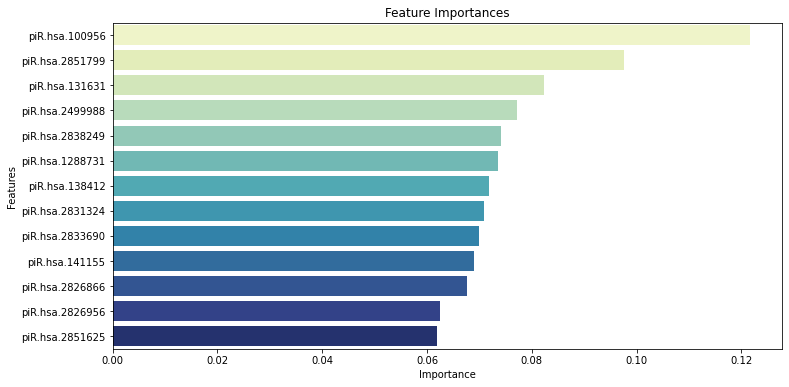

In [25]:
df = pd.DataFrame({'Features': sorted_features, 'Importances': sorted_importances})

# Sort the DataFrame by Importances
df = df.sort_values('Importances', ascending=False)

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importances', y='Features', data=df,palette='YlGnBu')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
#plt.savefig("/home/zgao/R/GEO_count/python_plot2/Training cohort feature_importance.pdf", format='pdf')
plt.show()

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_features': ['sqrt', 2, 3, 4, 5],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
   'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [44]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=50, verbose=2)

In [45]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=50,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_features': ['sqrt', 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [40]:
best_params = grid_search.best_params_
best_params = {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
print("Best parameters found: ", best_params)

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [46]:
best_rf_classifier = RandomForestClassifier(**best_params,random_state=42)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [47]:
accuracy_train = best_rf_classifier.score(X_train, y_train)
print("train set accuracy: ", accuracy_train)

average_cv_accuracy = grid_search.best_score_
print("Average CV accuracy: ", average_cv_accuracy)

train set accuracy:  0.958128078817734
Average CV accuracy:  0.7929485722941754


In [175]:
accuracy_test = best_rf_classifier.score(X_test, y_test)

print("Test set accuracy: ", accuracy_test)


Test set accuracy:  0.6


In [138]:
y_pred_proba_train = best_rf_classifier.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train, pos_label='tumor')
auc_value_train = roc_auc_score(y_train, y_pred_proba_train)
print("AUC_train:",auc_value_train)
youden_J_train = tpr_train - fpr_train

# Locate the index of the largest J statistic
ix = np.argmax(youden_J_train)
optimal_threshold_train = thresholds_train[ix]

print('Best Threshold=%f, Youden J=%.3f' % (optimal_threshold_train, youden_J_train[ix]))

# gmeans_train = np.sqrt(tpr_train * (1-fpr_train))

# # Locate the index of the largest G-mean
# ix = np.argmax(gmeans_train)
# print("AUC: ", auc_value_train)
# print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_train[ix], gmeans_train[ix]))

AUC_train: 0.9956791135298168
Best Threshold=0.562429, Youden J=0.940


In [176]:
y_pred_proba_test = best_rf_classifier.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test, pos_label='tumor')
auc_value_test = roc_auc_score(y_test, y_pred_proba_test)
print("AUC_test:",auc_value_test)
youden_J_test = tpr_test - fpr_test

# Locate the index of the largest J statistic
ix_test = np.argmax(youden_J_test)
optimal_threshold_test = thresholds_test[ix_test]

print('Best Threshold=%f, Youden J=%.3f' % (optimal_threshold_test, youden_J_test[ix_test]))

# gmeans_test = np.sqrt(tpr_test * (1-fpr_test))

# # Locate the index of the largest G-mean
# ix = np.argmax(gmeans_test)
# print("AUC: ", auc_value_test)
# print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_test[ix], gmeans_test[ix]))


AUC_test: 0.6121794871794872
Best Threshold=0.624263, Youden J=0.333


In [51]:
#threshold at 0.5
y_pred_train=best_rf_classifier.predict(X_train)
f1_train=f1_score(y_train,y_pred_train,pos_label='tumor')
precision_train_score = precision_score(y_train, y_pred_train, pos_label='tumor')
recall_train_score = recall_score(y_train, y_pred_train, pos_label='tumor')
print(f"F1-Score_train: {f1_train}")
print(f"Precision_train: {precision_train_score}")
print(f"Recall_train: {recall_train_score}")

y_pred_test=best_rf_classifier.predict(X_test)
f1_test=f1_score(y_test,y_pred_test,pos_label='tumor')
precision_test_score = precision_score(y_test, y_pred_test, pos_label='tumor')
recall_test_score = recall_score(y_test, y_pred_test, pos_label='tumor')
print(f"F1-Score_test: {f1_test}")
print(f"Precision_test: {precision_test_score}")
print(f"Recall_test: {recall_test_score}")



F1-Score_train: 0.9678030303030303
Precision_train: 0.948051948051948
Recall_train: 0.988394584139265
F1-Score_test: 0.8432203389830509
Precision_test: 0.7991967871485943
Recall_test: 0.8923766816143498


In [52]:
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_proba_train,pos_label='tumor')
f1_scores_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
# Handle division by zero in case precision and recall are both zero
f1_scores_train = np.nan_to_num(f1_scores_train)

optimal_idx_train = np.argmax(f1_scores_train)
optimal_threshold_train = thresholds_test[optimal_idx_train]
best_f1_score_train = f1_scores_train[optimal_idx_train] 
print("Optimal threshold:", optimal_threshold_train)
print("best f score:", best_f1_score_train)


y_pred_optimal_threshold_train = np.where(y_pred_proba_train >= optimal_threshold_train, "tumor", "normal")

tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_optimal_threshold_train).ravel()

ppv_train = tp_train / (tp_train + fp_train) if (tp_train + fp_train) != 0 else 0

# Negative Predictive Value
npv_train = tn_train / (tn_train + fn_train) if (tn_train + fn_train) != 0 else 0

# Sensitivity (Recall)
sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) != 0 else 0

# Specificity
specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) != 0 else 0

#AUPRC
auprc_train = auc(recall_train, precision_train)
print("auprc_train:", auprc_train)

print(f"PPV/Precision: {ppv_train}")
print(f"NPV: {npv_train}")
print(f"Sensitivity/Recall: {sensitivity_train}")
print(f"Specificity: {specificity_train}")

Optimal threshold: 0.44159523809523804
best f score: 0.9787644787644788
auprc_train: 0.9976260120765177
PPV/Precision: 0.9276672694394213
NPV: 0.9845559845559846
Sensitivity/Recall: 0.9922630560928434
Specificity: 0.864406779661017


In [177]:
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_proba_test,pos_label='tumor')
f1_scores_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
# Handle division by zero in case precision and recall are both zero
f1_scores_test = np.nan_to_num(f1_scores_test)

optimal_idx_test = np.argmax(f1_scores_test)
optimal_threshold_test = thresholds_test[optimal_idx_test]
best_f1_score_test = f1_scores_test[optimal_idx_test] 
print("Optimal threshold:", optimal_threshold_test)
print("best f score:", best_f1_score_test)


y_pred_optimal_threshold_test = np.where(y_pred_proba_test >= optimal_threshold_test, "tumor", "normal")

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_optimal_threshold_test).ravel()

ppv_test = tp_test / (tp_test + fp_test) if (tp_test + fp_test) != 0 else 0

# Negative Predictive Value
npv_test = tn_test / (tn_test + fn_test) if (tn_test + fn_test) != 0 else 0

# Sensitivity (Recall)
sensitivity_test = tp_test / (tp_test + fn_test) if (tp_test + fn_test) != 0 else 0

# Specificity
specificity_test = tn_test / (tn_test + fp_test) if (tn_test + fp_test) != 0 else 0


#AUPRC
auprc_test = auc(recall_test, precision_test)
print("auprc_test:", auprc_test)

print(f"PPV/Precision: {ppv_test}")
print(f"NPV: {npv_test}")
print(f"Sensitivity/Recall: {sensitivity_test}")
print(f"Specificity: {specificity_test}")

Optimal threshold: 0.6242626262626261
best f score: 0.7017543859649124
auprc_test: 0.5376626424088083
PPV/Precision: 0.6060606060606061
NPV: 0.7647058823529411
Sensitivity/Recall: 0.8333333333333334
Specificity: 0.5


In [36]:
# y_pred_proba_val = best_rf_classifier.predict_proba(X_val)[:, 1]
# fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val, pos_label='tumor')
# auc_value_val = roc_auc_score(y_val, y_pred_proba_val)

# gmeans_val = np.sqrt(tpr_val * (1-fpr_val))

# # Locate the index of the largest G-mean
# ix = np.argmax(gmeans_val)
# print("AUC: ", auc_value_val)
# print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_val[ix], gmeans_val[ix]))

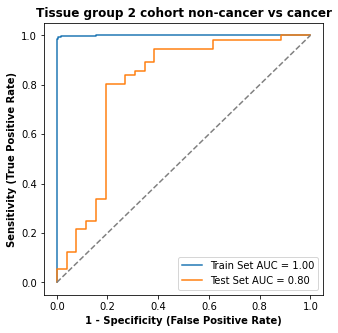

In [41]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(5, 5))

# plot ROC curve for the train set
plt.plot(fpr_train, tpr_train, label=f'Train Set AUC = {auc_value_train:.2f}')

# Plot ROC curve for the test set
plt.plot(fpr_test, tpr_test, label=f'Test Set AUC = {auc_value_test:.2f}')

# Plot ROC curve for the validation set
# plt.plot(fpr_val, tpr_val, label=f'Validation Set AUC = {auc_value_val:.2f}', linestyle='-.')  # You can change the linestyle as you like

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('Tissue group 2 cohort non-cancer vs cancer',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(False)
#plt.savefig('/home/zgao/R/GEO_count/python_plot/Tissue group 2 test_roc.pdf', format='pdf')
plt.show()


auprc_train: 0.9976260120765177
auprc_test: 0.5376626424088083


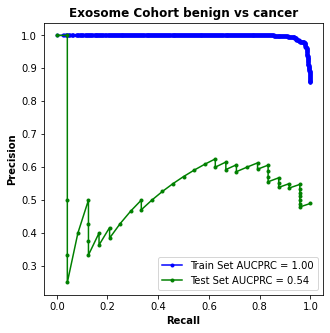

In [178]:
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train,pos_label='tumor')
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba_test,pos_label='tumor')
auprc_train = auc(recall_train, precision_train)
print("auprc_train:", auprc_train)
auprc_test = auc(recall_test, precision_test)
print("auprc_test:", auprc_test)

# precision_val, recall_val, _ = precision_recall_curve(y_val, y_pred_proba_val,pos_label='tumor')


plt.figure(figsize=(5, 5))
plt.plot(recall_train, precision_train, marker='.', label=f'Train Set AUCPRC = {auprc_train:.2f}', color='blue')

# Plot for test set
plt.plot(recall_test, precision_test, marker='.', label=f'Test Set AUCPRC = {auprc_test:.2f}', color='green')

# Plot for validation set
# plt.plot(recall_val, precision_val, marker='.', label='Validation', color='red')

# Labeling the axes and setting the title
plt.xlabel('Recall',fontweight='bold')
plt.ylabel('Precision',fontweight='bold')
plt.title('Exosome Cohort benign vs cancer',fontweight='bold')

# Display the legend
plt.legend()
plt.savefig('/home/zgao/R/GEO_count/python_plot/exosome_BC_13_precision_recall.pdf', format='pdf')
# Show the plot
plt.show()

In [48]:
def compute_metrics_from_cm(cm):
    # Extracting values from the confusion matrix
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]

    # Calculating Sensitivity and Specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    

    return sensitivity, specificity

In [49]:
y_pred_train_labels = ["tumor" if p >= 0.56 else "normal" for p in y_pred_proba_train]
y_pred_test_labels = ["tumor" if p >= 0.597841 else "normal" for p in y_pred_proba_test]

In [50]:
cm_test = confusion_matrix(y_test, y_pred_test_labels)
print("Confusion Matrix:")
print(cm_test)
sensitivity_test, specificity_test = compute_metrics_from_cm(cm_test)
print("sensitivity_test, specificity_test:")
print(sensitivity_test, specificity_test)

cm_train = confusion_matrix(y_train, y_pred_train_labels)
sensitivity_train, specificity_train = compute_metrics_from_cm(cm_train)
print("sensitivity_train, specificity_train:")
print(sensitivity_train, specificity_train)

Confusion Matrix:
[[ 56  12]
 [ 25 141]]
sensitivity_test, specificity_test:
0.8235294117647058 0.8493975903614458
sensitivity_train, specificity_train:
0.9491525423728814 0.9806576402321083


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(7, 5), text_size=14):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    if classes is None:
        classes = [str(i) for i in range(n_classes)]
        
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm_norm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    ax.set(title=' threhold', 
           xlabel='Predicted Label', 
           ylabel='True Label', 
           xticks=np.arange(n_classes), 
           yticks=np.arange(n_classes), 
           xticklabels=classes, 
           yticklabels=classes)
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size * 1.2)
    
    threshold = (cm_norm.max() + cm_norm.min()) / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', 
                 horizontalalignment='center', 
                 color='white' if cm_norm[i, j] > threshold else 'black', 
                 size=text_size)
    


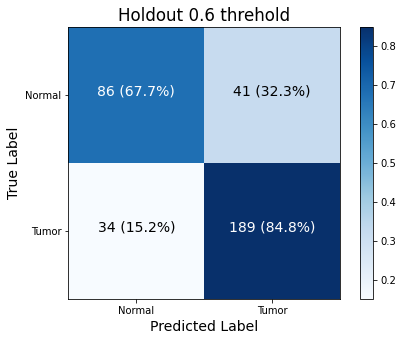

In [254]:
classes = ['Normal', 'Tumor']
plot_confusion_matrix(y_test, y_pred_test_labels, classes)
plt.savefig('/home/zgao/R/GEO_count/confusion_matrix/tissue_13_confusion_matrix.svg', format='svg')
plt.show()

In [494]:
inde_data=pd.read_csv("R/GEO_count/GSE148861_rf.csv")

In [495]:
inde_data=inde_data.drop(columns=['Unnamed: 0'])

In [496]:
inde_test=inde_data.drop(columns=['group'])
y_inde=inde_data['group']

In [497]:
inde_test

,piR-hsa-1255575,piR-hsa-130844,piR-hsa-134405,piR-hsa-137567,piR-hsa-146397,piR-hsa-147491,piR-hsa-152144,piR-hsa-157340,piR-hsa-165803,piR-hsa-168625,piR-hsa-2843805,piR-hsa-2852354,piR-hsa-333323,piR-hsa-339610,piR-hsa-3631004,piR-hsa-4462631,piR-hsa-720022,piR-hsa-728565,piR-hsa-742754,piR-hsa-777268
0,0.830416,6.963583,6.288279,1.463780,-0.226828,1.205398,1.324736,1.083946,3.520868,1.414228,2.567361,1.584477,0.549755,1.211966,0.887131,1.449910,2.863626,2.261808,0.511820,0.275708
1,0.815609,6.603349,5.934849,1.445841,0.401504,1.209179,1.323514,0.733562,3.507080,1.494591,2.735870,1.558235,0.454312,1.045463,0.737541,1.425798,2.756307,2.655815,0.505140,0.272080
2,0.818284,6.258260,5.594791,1.601015,-0.470962,1.203054,1.315101,0.850161,3.658075,1.478803,2.605294,1.578971,0.478458,1.286795,0.965183,1.487299,3.134408,2.919192,0.523144,0.291343
3,0.825377,6.506381,5.850002,1.457189,-0.056718,1.203054,1.315101,1.048379,3.856886,1.497634,2.763190,1.611803,0.512126,1.231694,0.924932,1.429725,2.822967,3.136073,0.520168,0.280037
4,0.842689,6.545233,5.890593,1.531792,-0.178802,1.219691,1.337906,0.979786,3.826203,1.531620,2.688505,1.700674,0.356785,1.181011,0.852632,1.441166,3.183275,3.158522,0.519576,0.249678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.815791,6.146834,5.503653,1.447351,1.400104,1.221885,1.340904,0.850718,3.453783,1.551512,2.460535,1.545418,0.159417,1.014205,0.712408,1.296651,2.851651,2.056739,0.511943,0.246899
72,0.817556,5.999721,5.354820,1.427488,1.887471,1.233351,1.356527,0.897041,3.329709,1.609234,2.392085,1.562772,0.132779,1.084271,0.769909,1.293564,2.769289,2.463243,0.504056,0.225621
73,0.819372,4.931163,4.278545,1.406785,1.840749,1.236664,1.361029,0.796971,3.587277,1.446435,2.524012,1.519695,0.160665,0.864825,0.564994,1.323774,2.587825,2.179437,0.509929,0.258851
74,0.871605,6.634252,5.980954,1.484521,4.084650,1.321393,1.474440,1.171677,4.169828,2.538920,2.846706,1.677744,0.243454,1.724180,1.395114,1.472658,3.107110,2.841021,0.515160,0.323830


In [498]:
y_pred_proba_inde = best_rf_classifier.predict_proba(inde_test)[:, 1]
y_inde_binary = label_binarize(y_inde, classes=['normal', 'tumor']).flatten()
fpr_inde, tpr_inde, _ = roc_curve(y_inde_binary, y_pred_proba_inde)
auc_value_inde = roc_auc_score(y_inde_binary, y_pred_proba_inde)
print("AUC: ", auc_value_inde)

AUC:  0.7694117647058824


In [429]:
accuracy_inde = best_rf_classifier.score(inde_test, y_inde)

print("Test set accuracy: ", accuracy_inde)

Test set accuracy:  0.4888888888888889


In [263]:
y_pred_proba_inde = best_rf_classifier.predict_proba(inde_test)[:, 1]
fpr_inde, tpr_inde, thresholds_inde = roc_curve(y_inde, y_pred_proba_inde, pos_label='tumor')
auc_value_inde = roc_auc_score(y_inde, y_pred_proba_inde)

gmeans_inde = np.sqrt(tpr_inde * (1-fpr_inde))

# Locate the index of the largest G-mean
ix = np.argmax(gmeans_inde)
print("AUC: ", auc_value_inde)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_inde[ix], gmeans_inde[ix]))


AUC:  0.8093306288032454
Best Threshold=0.480000, G-Mean=0.754


In [91]:
y_pred_inde_labels = ["tumor" if p >= 0.355125 else "normal" for p in y_pred_proba_inde]

In [710]:
cm = confusion_matrix(y_inde, y_pred_inde_labels)
print("Confusion Matrix:")
print(cm)
sensitivity_inde, specificity_inde = compute_metrics_from_cm(cm)
print("sensitivity_inde, specificity_inde:")
print(sensitivity_inde, specificity_inde)

Confusion Matrix:
[[18  7]
 [ 5 46]]
sensitivity_inde, specificity_inde:
0.72 0.9019607843137255


In [207]:
bar_2=pd.DataFrame({'group': 'GSE204951','F1-Score_test':f1_test.flatten(),'Precision_test':precision_test_score.flatten(),'Recall_test': recall_test_score.flatten(),
                    'F1-Score_val':f1_val.flatten(),'Precision_val':precision_val_score.flatten(),'Recall_val': recall_val_score.flatten(),
                    'sensitivity_test':sensitivity_test, 'specificity_test':specificity_test,
                     'sensitivity_val':sensitivity_val, 'specificity_val':specificity_val,
                    'accuracy_test':accuracy_test,'accuracy_val':accuracy_val})

In [208]:
bar_2

,group,F1-Score_test,Precision_test,Recall_test,F1-Score_val,Precision_val,Recall_val,sensitivity_test,specificity_test,sensitivity_val,specificity_val,accuracy_test,accuracy_val
0,GSE204951,0.75,0.666667,0.857143,0.9,0.9,0.9,0.727273,0.857143,0.888889,0.9,0.777778,0.894737


In [163]:
bar_1=pd.DataFrame({'group': 'GSE148861','F1-Score_test':f1_test.flatten(),'Precision_test':precision_test_score.flatten(),'Recall_test': recall_test_score.flatten(),
                    'F1-Score_val':f1_val.flatten(),'Precision_val':precision_val_score.flatten(),'Recall_val': recall_val_score.flatten(),
                    'sensitivity_test':sensitivity_test, 'specificity_test':specificity_test,
                     'sensitivity_val':sensitivity_val, 'specificity_val':specificity_val,
                    'accuracy_test':accuracy_test,'accuracy_val':accuracy_val})

In [164]:
bar_1

,group,F1-Score_test,Precision_test,Recall_test,F1-Score_val,Precision_val,Recall_val,sensitivity_test,specificity_test,sensitivity_val,specificity_val,accuracy_test,accuracy_val
0,GSE148861,0.761905,0.727273,0.8,0.869565,0.769231,1.0,0.4,0.8,0.5,1.0,0.666667,0.8125


In [255]:
perm = PermutationImportance(best_rf_classifier, random_state=42).fit(X_test, y_test)

perm_importances = perm.feature_importances_
std = perm.feature_importances_std_
indices = np.argsort(perm_importances)[::-1]

In [256]:
perm_importances = [(feature, importance) for feature, importance in zip(sorted_features, perm_importances[indices])]

In [257]:
perm_importances.sort(key=lambda x: x[1], reverse=True)

In [258]:
features, importances = zip(*perm_importances)

In [259]:
sorted_features

('piR-hsa-130959',
 'piR-hsa-100956',
 'piR-hsa-122506',
 'piR-hsa-1248077',
 'piR-hsa-1254233')

In [260]:
print(len(sorted_features))

5


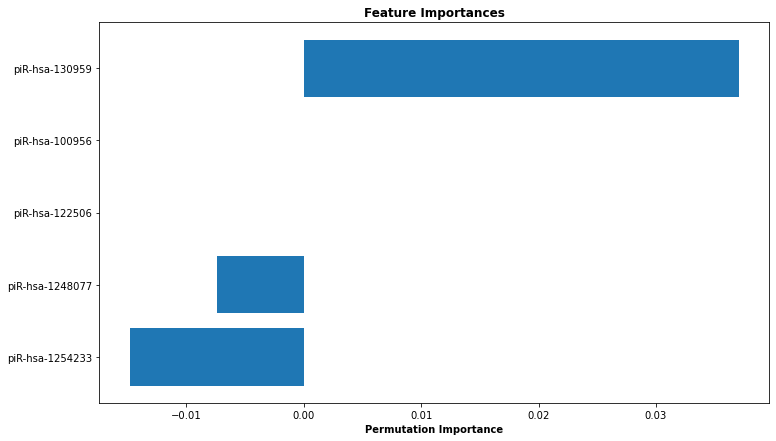

In [261]:
plt.figure(figsize=(12, 7))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.gca().invert_yaxis() # Invert the y-axis to have the most important feature on top
plt.xlabel('Permutation Importance',fontweight='bold')
plt.title('Feature Importances',fontweight='bold')
#plt.savefig('plasma_permutation_importance.pdf', format='pdf')
plt.show()

In [35]:
positive_importance_features = [feature for feature, importance in zip(features, importances) if importance > 0]

In [36]:
positive_importance_features

['piR_hsa_2499988',
 'piR_hsa_100956',
 'piR_hsa_112592',
 'piR_hsa_1248077',
 'piR_hsa_108790',
 'piR_hsa_1248184']

In [37]:
print(len(positive_importance_features))

6


In [38]:
selected_indices = [X_train.columns.get_loc(feature) for feature in positive_importance_features]

In [39]:
X_train_selected_features = X_train.iloc[:, selected_indices]
X_test_selected_features = X_test.iloc[:, selected_indices]
X_val_selected_features = X_val.iloc[:, selected_indices]

In [40]:
X_val_selected_features.shape

(26, 6)

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

In [43]:
grid_search.fit(X_train_selected_features, y_train)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [44]:
best_params_perm = grid_search.best_params_
print("Best parameters found: ", best_params_perm)

Best parameters found:  {'bootstrap': True, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [45]:
best_rf_classifier = RandomForestClassifier(**best_params_perm,random_state=42)
best_rf_classifier.fit(X_train_selected_features, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

In [46]:
accuracy_test = best_rf_classifier.score(X_test_selected_features, y_test)
print("Test set accuracy: ", accuracy_test)

Test set accuracy:  0.88


In [47]:
accuracy_val = best_rf_classifier.score(X_val_selected_features, y_val)
print("Test set accuracy: ", accuracy_val)

Test set accuracy:  0.9615384615384616


In [48]:
y_pred_proba_train = best_rf_classifier.predict_proba(X_train_selected_features)[:, 1]
y_train_binary = label_binarize(y_train, classes=['normal', 'tumor']).flatten()
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_pred_proba_train)
auc_value_train = roc_auc_score(y_train_binary, y_pred_proba_train)
print("AUC: ", auc_value_train)

AUC:  0.98559670781893


In [49]:
y_pred_proba_test = best_rf_classifier.predict_proba(X_test_selected_features)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test, pos_label='tumor')
auc_value_test = roc_auc_score(y_test, y_pred_proba_test)
print("AUC: ", auc_value_test)

AUC:  0.9533333333333334


In [50]:
y_pred_proba_val = best_rf_classifier.predict_proba(X_val_selected_features)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val, pos_label='tumor')
auc_value_val = roc_auc_score(y_val, y_pred_proba_val)
print("AUC: ", auc_value_val)

AUC:  0.9869281045751633


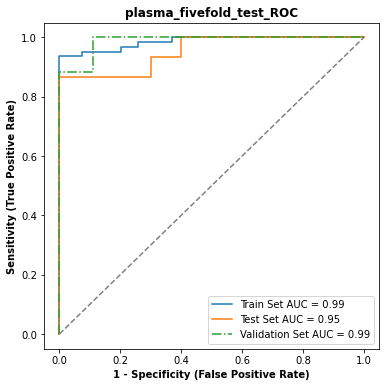

In [51]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
plt.plot(fpr_train, tpr_train, label=f'Train Set AUC = {auc_value_train:.2f}')

# Plot ROC curve for the test set
plt.plot(fpr_test, tpr_test, label=f'Test Set AUC = {auc_value_test:.2f}')

# Plot ROC curve for the validation set
plt.plot(fpr_val, tpr_val, label=f'Validation Set AUC = {auc_value_val:.2f}', linestyle='-.')  # You can change the linestyle as you like

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('plasma_fivefold_test_ROC',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(False)
plt.savefig('plasma_test_roc.pdf', format='pdf')
plt.show()


In [52]:
def compute_metrics_from_cm(cm):
    # Extracting values from the confusion matrix
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]

    # Calculating Sensitivity and Specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    return sensitivity, specificity


In [53]:
y_pred_test_labels = ["tumor" if p >= 0.5 else "normal" for p in y_pred_proba_test]

In [54]:
cm = confusion_matrix(y_test, y_pred_test_labels)
sensitivity, specificity = compute_metrics_from_cm(cm)
print("Confusion Matrix:")
print(cm)
print("sensitivity, specificity:")
print(sensitivity, specificity)

Confusion Matrix:
[[ 9  1]
 [ 2 13]]
sensitivity, specificity:
0.9 0.8666666666666667


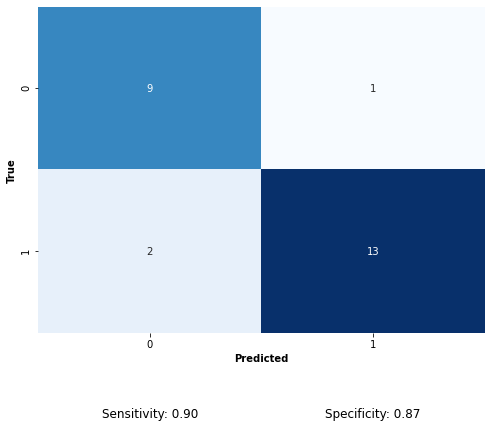

In [55]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('True',fontweight='bold')

# Adding Sensitivity and Specificity to the heatmap
ax.text(0.5, 2.5, f"Sensitivity: {sensitivity:.2f}", size=12, ha="center", va="center")
ax.text(1.5, 2.5, f"Specificity: {specificity:.2f}", size=12, ha="center", va="center")

plt.savefig('plasma_test_confusion_matrices.pdf', format='pdf')
plt.show()




In [56]:
y_pred_val_labels = ["tumor" if p >= 0.5 else "normal" for p in y_pred_proba_val]

In [57]:
cm = confusion_matrix(y_val, y_pred_val_labels)
print("Confusion Matrix:")
print(cm)
sensitivity, specificity = compute_metrics_from_cm(cm)
print("sensitivity, specificity:")
print(sensitivity, specificity)

Confusion Matrix:
[[ 8  1]
 [ 0 17]]
sensitivity, specificity:
0.8888888888888888 1.0


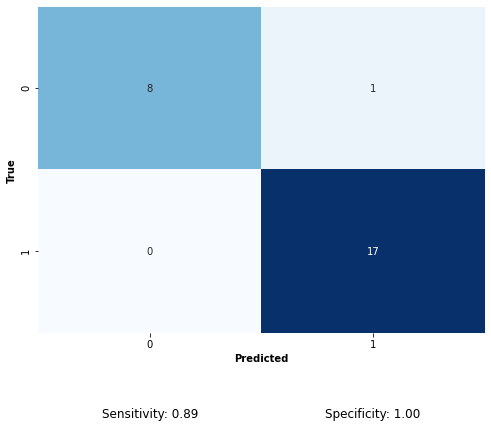

In [58]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('True',fontweight='bold')

# Adding Sensitivity and Specificity to the heatmap
ax.text(0.5, 2.5, f"Sensitivity: {sensitivity:.2f}", size=12, ha="center", va="center")
ax.text(1.5, 2.5, f"Specificity: {specificity:.2f}", size=12, ha="center", va="center")

plt.savefig('plasma_val_confusion_matrices.pdf', format='pdf')
plt.show()


In [140]:
new_candidate=['piR_hsa_2856477', 'piR_hsa_142355','piR_hsa_100956']

In [25]:
new_candidate=['piR_hsa_100956','piR_hsa_1248077']

In [13]:
new_candidate=['piR_hsa_1248077']

In [26]:
plasma_new_X = X[new_candidate]

In [27]:
new_y = plasma_rf['group']

In [28]:
plasma_new_X

,piR_hsa_100956,piR_hsa_1248077
0,12.910722,5.616039
1,12.687488,5.498734
2,11.605544,5.407376
3,12.083015,4.691218
4,11.946797,4.915469
...,...,...
163,11.968415,5.610301
164,11.352650,5.874073
165,11.080142,5.541921
166,11.161624,5.802862


In [29]:
X_train_new, temp_set_new, y_train_new, y_temp_new = train_test_split(plasma_new_X, new_y, test_size=0.3, random_state=42)

In [30]:
X_test_new, X_val_new, y_test_new, y_val_new = train_test_split(
    temp_set_new, y_temp_new, test_size=0.5, random_state=42)

In [31]:
X_train_new.shape

(117, 2)

In [32]:
X_test_new.shape

(25, 2)

In [21]:
rf_classifier_new = RandomForestClassifier(random_state=42)

In [22]:
rf_classifier_new.fit(X_train_new, y_train_new)

RandomForestClassifier(random_state=42)

In [25]:
grid_search = GridSearchCV(estimator=rf_classifier_new, param_grid=param_grid,
                           cv=5, n_jobs=50, verbose=2)

In [26]:
grid_search.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=50,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [27]:
best_params_perm = grid_search.best_params_
print("Best parameters found: ", best_params_perm)

Best parameters found:  {'bootstrap': False, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [28]:
best_rf_classifier = RandomForestClassifier(**best_params_perm,random_state=42)
best_rf_classifier.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=False, max_depth=2, n_estimators=50,
                       random_state=42)

In [29]:
accuracy_test_new = best_rf_classifier.score(X_test_new, y_test_new)
print("Test set accuracy: ", accuracy_test_new)

Test set accuracy:  0.8


In [30]:
accuracy_val_new = best_rf_classifier.score(X_val_new, y_val_new)
print("Test set accuracy: ", accuracy_val_new)

Test set accuracy:  0.7692307692307693


In [31]:
y_pred_proba_train_new = best_rf_classifier.predict_proba(X_train_new)[:, 1]
y_train_binary_new = label_binarize(y_train_new, classes=['normal', 'tumor']).flatten()
fpr_train_new, tpr_train_new, _ = roc_curve(y_train_binary_new, y_pred_proba_train_new)
auc_value_train_new = roc_auc_score(y_train_binary_new, y_pred_proba_train_new)
print("AUC: ", auc_value_train_new)

AUC:  0.8952087007642564


In [32]:
y_pred_proba_test_new = best_rf_classifier.predict_proba(X_test_new)[:, 1]
fpr_test_new, tpr_test_new, _ = roc_curve(y_test_new, y_pred_proba_test_new, pos_label='tumor')
auc_value_test_new = roc_auc_score(y_test_new, y_pred_proba_test_new)
print("AUC: ", auc_value_test_new)

AUC:  0.8566666666666667


In [33]:
y_pred_proba_val_new = best_rf_classifier.predict_proba(X_val_new)[:, 1]
fpr_val_new, tpr_val_new, _ = roc_curve(y_val_new, y_pred_proba_val_new, pos_label='tumor')
auc_value_val_new = roc_auc_score(y_val_new, y_pred_proba_val_new)
print("AUC: ", auc_value_val_new)

AUC:  0.8333333333333333


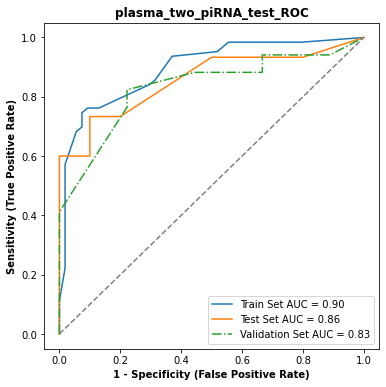

In [36]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
plt.plot(fpr_train_new, tpr_train_new, label=f'Train Set AUC = {auc_value_train_new:.2f}')

# Plot ROC curve for the test set
plt.plot(fpr_test_new, tpr_test_new, label=f'Test Set AUC = {auc_value_test_new:.2f}')

# Plot ROC curve for the validation set
plt.plot(fpr_val_new, tpr_val_new, label=f'Validation Set AUC = {auc_value_val_new:.2f}', linestyle='-.')  # You can change the linestyle as you like

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('plasma_two_piRNA_test_ROC',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(False)
plt.savefig('plasma_2piRNA.pdf', format='pdf')
plt.show()


In [33]:
model = LogisticRegression()
model.fit(X_train_new, y_train_new)

LogisticRegression()

In [34]:
y_train_pred_log = model.predict(X_train_new)
y_test_pred_log = model.predict(X_test_new)
y_val_pred_log = model.predict(X_val_new)

In [35]:

# Compute accuracy for validation and test sets
acc_train_log = accuracy_score(y_train_new, y_train_pred_log)
acc_val_log = accuracy_score(y_val_new, y_val_pred_log)
acc_test_log = accuracy_score(y_test_new, y_test_pred_log)

# Compute predicted probabilities for AUC calculation
y_train_prob_log = model.predict_proba(X_train_new)[:, 1]
y_val_prob_log = model.predict_proba(X_val_new)[:, 1]
y_test_prob_log = model.predict_proba(X_test_new)[:, 1]

# Compute AUC for validation and test sets
auc_train_log = roc_auc_score(y_train_new, y_train_prob_log)
auc_val_log = roc_auc_score(y_val_new, y_val_prob_log)
auc_test_log = roc_auc_score(y_test_new, y_test_prob_log)

#roc_curve
y_train_binary_log = label_binarize(y_train_new, classes=['normal', 'tumor']).flatten()
fpr_train_log, tpr_train_log, _ = roc_curve(y_train_binary_log, y_train_prob_log)

y_test_binary_log = label_binarize(y_test_new, classes=['normal', 'tumor']).flatten()
fpr_test_log, tpr_test_log, _ = roc_curve(y_test_binary_log, y_test_prob_log)

y_val_binary_log = label_binarize(y_val_new, classes=['normal', 'tumor']).flatten()
fpr_val_log, tpr_val_log, _ = roc_curve(y_val_binary_log, y_val_prob_log)

print(f"train Accuracy: {acc_train_log:.4f}")
print(f"train AUC: {auc_train_log:.4f}")

print(f"Validation Accuracy: {acc_val_log:.4f}")
print(f"Validation AUC: {auc_val_log:.4f}")

print(f"test Accuracy: {acc_test_log:.4f}")
print(f"Test AUC: {auc_test_log:.4f}")




train Accuracy: 0.7521
train AUC: 0.8189
Validation Accuracy: 0.7308
Validation AUC: 0.8105
test Accuracy: 0.7600
Test AUC: 0.8800


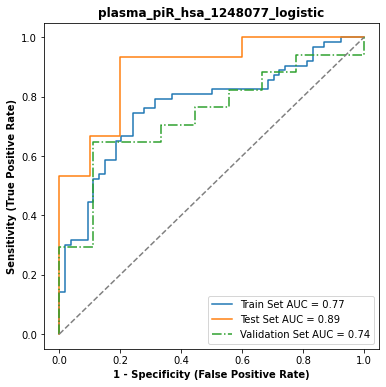

In [24]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
plt.plot(fpr_train_log, tpr_train_log, label=f'Train Set AUC = {auc_train_log:.2f}')

# Plot ROC curve for the test set
plt.plot(fpr_test_log, tpr_test_log, label=f'Test Set AUC = {auc_test_log:.2f}')

# Plot ROC curve for the validation set
plt.plot(fpr_val_log, tpr_val_log, label=f'Validation Set AUC = {auc_val_log:.2f}', linestyle='-.')  # You can change the linestyle as you like

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('plasma_piR_hsa_1248077_logistic',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(False)
plt.savefig('plasma_piR_hsa_1248077_logistic.pdf', format='pdf')
plt.show()


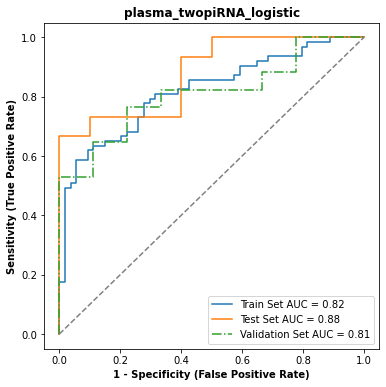

In [36]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
plt.plot(fpr_train_log, tpr_train_log, label=f'Train Set AUC = {auc_train_log:.2f}')

# Plot ROC curve for the test set
plt.plot(fpr_test_log, tpr_test_log, label=f'Test Set AUC = {auc_test_log:.2f}')

# Plot ROC curve for the validation set
plt.plot(fpr_val_log, tpr_val_log, label=f'Validation Set AUC = {auc_val_log:.2f}', linestyle='-.')  # You can change the linestyle as you like

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('plasma_twopiRNA_logistic',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(False)
plt.savefig('plasma_twopiRNA_logistic.pdf', format='pdf')
plt.show()
